### Abstract

# I. Introduction

### Load packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

### Data collection

In [2]:
sales_data = pd.read_csv(r'../Raw_Data/SalesForCourse_quizz_table.csv')

### Data defintion

In [3]:
# shape of the data

print(sales_data.shape) 

(34867, 16)


In [4]:
# first 5 rows

print(sales_data.head()) 

   index      Date    Year     Month  Customer Age Customer Gender  \
0      0  02/19/16  2016.0  February          29.0               F   
1      1  02/20/16  2016.0  February          29.0               F   
2      2  02/27/16  2016.0  February          29.0               F   
3      3  03/12/16  2016.0     March          29.0               F   
4      4  03/12/16  2016.0     March          29.0               F   

         Country       State Product Category     Sub Category  Quantity  \
0  United States  Washington      Accessories  Tires and Tubes       1.0   
1  United States  Washington         Clothing           Gloves       2.0   
2  United States  Washington      Accessories  Tires and Tubes       3.0   
3  United States  Washington      Accessories  Tires and Tubes       2.0   
4  United States  Washington      Accessories  Tires and Tubes       3.0   

   Unit Cost  Unit Price   Cost  Revenue  Column1  
0      80.00  109.000000   80.0    109.0      NaN  
1      24.50   28.

In [5]:
# data types

print(sales_data.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [6]:
# columns names

print(sales_data.columns)

Index(['index', 'Date', 'Year', 'Month', 'Customer Age', 'Customer Gender',
       'Country', 'State', 'Product Category', 'Sub Category', 'Quantity',
       'Unit Cost', 'Unit Price', 'Cost', 'Revenue', 'Column1'],
      dtype='object')


In [7]:
# unique values in each column

print(sales_data['Sub Category'].unique()) # 17 unique values

['Tires and Tubes' 'Gloves' 'Helmets' 'Bike Stands' 'Mountain Bikes'
 'Hydration Packs' 'Jerseys' 'Fenders' 'Cleaners' 'Socks' 'Caps'
 'Touring Bikes' 'Bottles and Cages' 'Vests' 'Road Bikes' 'Bike Racks'
 'Shorts' nan]


In [8]:
# number of unique values in each column

print(sales_data.nunique())

index               34867
Date                  576
Year                    2
Month                  12
Customer Age           70
Customer Gender         2
Country                 4
State                  45
Product Category        3
Sub Category           17
Quantity                3
Unit Cost             882
Unit Price           5175
Cost                  417
Revenue              3023
Column1              1281
dtype: int64


In [9]:
# range of values in each column

print(sales_data.describe())

              index          Year  Customer Age      Quantity     Unit Cost  \
count  34867.000000  34866.000000  34866.000000  34866.000000  34866.000000   
mean   17433.000000   2015.569237     36.382895      2.002524    349.880567   
std    10065.380254      0.495190     11.112902      0.813936    490.015846   
min        0.000000   2015.000000     17.000000      1.000000      0.670000   
25%     8716.500000   2015.000000     28.000000      1.000000     45.000000   
50%    17433.000000   2016.000000     35.000000      2.000000    150.000000   
75%    26149.500000   2016.000000     44.000000      3.000000    455.000000   
max    34866.000000   2016.000000     87.000000      3.000000   3240.000000   

         Unit Price          Cost       Revenue      Column1  
count  34866.000000  34866.000000  34867.000000  2574.000000  
mean     389.232485    576.004532    640.870093   688.054913  
std      525.319091    690.500395    736.640033   774.200897  
min        0.666667      2.000000   

# II. Data cleaning

In [10]:
# check for missing values

print(sales_data.isnull().sum())

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64


In [11]:
# view rows with missing values

sales_data[sales_data.isnull().any(axis=1)]

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,34862,02/07/16,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000,NaN
34863,34863,03/13/15,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000,NaN
34864,34864,04/05/15,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,NaN
34865,34865,08/30/15,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,NaN


In [12]:
# drop missing values

sales_data = sales_data.dropna()

In [13]:
# check for missing values

print(sales_data.isnull().sum())

index               0
Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
Column1             0
dtype: int64


In [14]:
# check for duplicates

print(sales_data.duplicated().sum())

0


In [15]:
# convert to datetime

sales_data['Date'] = pd.to_datetime(sales_data['Date']) 

In [16]:
# convert year column to int

sales_data['Year'] = sales_data['Year'].astype(int)

# III. Analyzing the data

### Overall trend in revenue

After preparing the Sales data, the first analysis we did was to examine the overall trend in revenue over time. By looking at the revenue by month, it appears that revenue peaks around June, then drops significantly in July before rising again in January. This got us wondering if there's a correlation between high revenue and seasons.

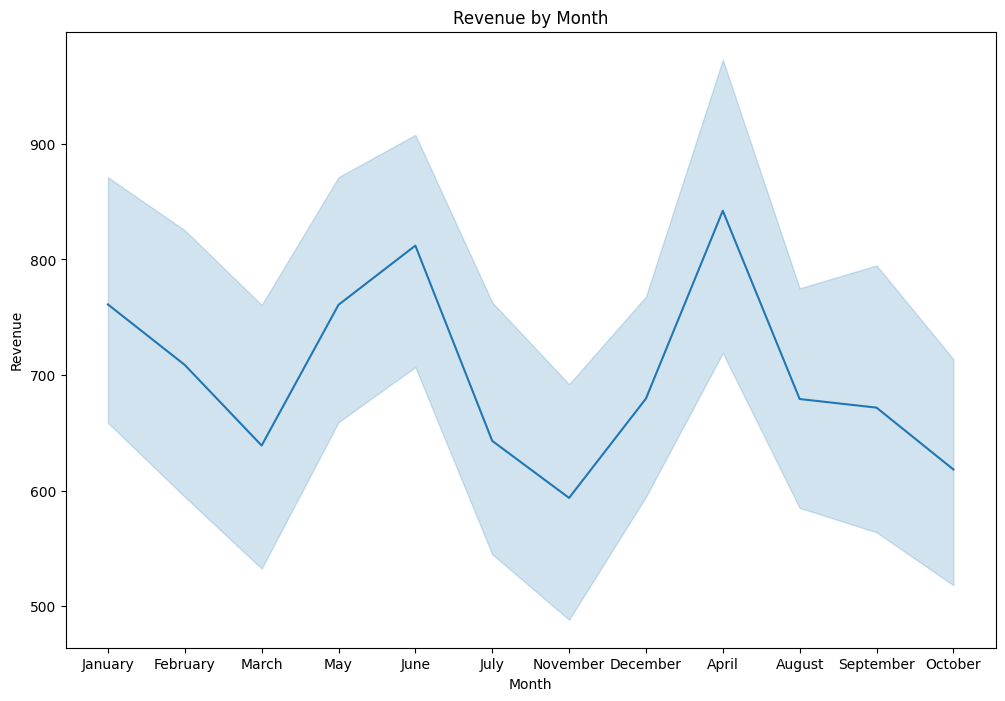

In [17]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Month', y='Revenue', data=sales_data)
plt.title('Revenue by Month')
plt.show()

To investigate this further, I created a new column in the dataset labeled "Season", in which each month was categorized accordingly.

In [18]:
sales_data = sales_data.assign(Season = sales_data['Month'].map({'January': 'Winter', 'February': 'Winter', 'March': 'Spring', 'April': 'Spring', 'May': 'Spring', 'June': 'Summer', 'July': 'Summer', 'August': 'Summer', 'September': 'Fall', 'October': 'Fall', 'November': 'Fall', 'December': 'Winter'}))

 Upon evaluating the frequency of occurrences, it was noted that the highest number of purchases occurred during the Spring season, followed by Winter, Summer, and Fall.

In [19]:
sales_data['Season'].value_counts()

Winter    710
Summer    693
Spring    589
Fall      582
Name: Season, dtype: int64

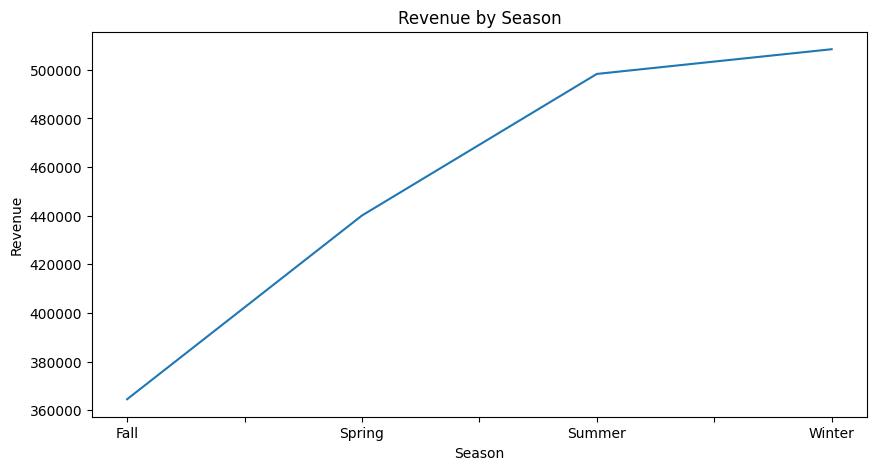

In [20]:
sales_data.groupby('Season')['Revenue'].sum().plot(kind='line', figsize=(10, 5))
plt.title('Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.show()

The following two visualizations provide additional confirmation of the trend in which sales appeared to peak during the late Spring months of May and June, prior to a decline during the Fall months.

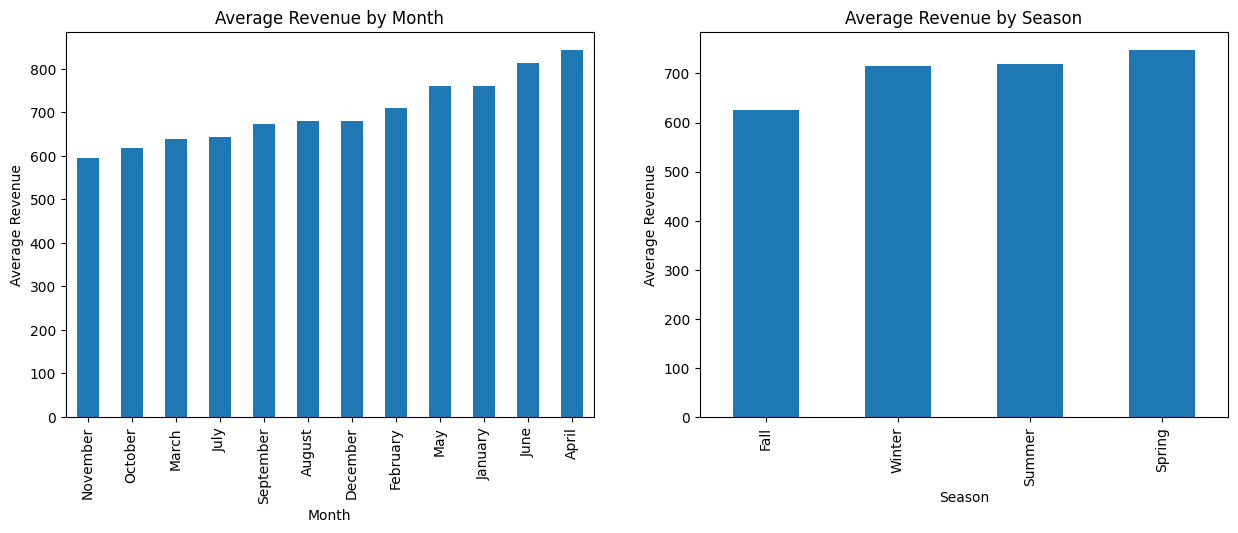

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sales_data.groupby('Month')['Revenue'].mean().sort_values().plot(kind='bar', ax=ax[0])
ax[0].set_title('Average Revenue by Month')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Average Revenue')
sales_data.groupby('Season')['Revenue'].mean().sort_values().plot(kind='bar', ax=ax[1])
ax[1].set_title('Average Revenue by Season')
ax[1].set_xlabel('Season')
ax[1].set_ylabel('Average Revenue')
plt.show()

In order to investigate the potential impact of the day of the week on revenue, the dates in the dataset were converted to corresponding days of the week (Monday, Tuesday, Wednesday, etc) and visualized using a bar graph. The analysis revealed that while profits tended to peak on Wednesdays, there was not a significant variation in revenue across the different days of the week.

In [22]:
sales_data['Day'] = sales_data['Date'].dt.day_name()

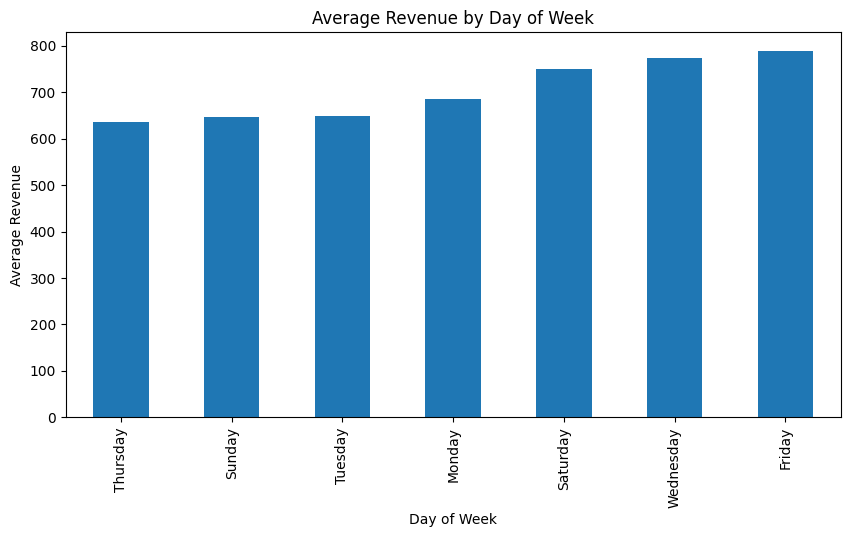

In [23]:
sales_data.groupby('Day')['Revenue'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Revenue by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Revenue')
plt.show()

Subsequently, an analysis of revenue by product category was conducted. The dataset contained three primary categories: accessories, clothing, and bikes. The results indicated that the highest revenue was generated by the bike category, while the lowest revenue was generated by the clothing category.

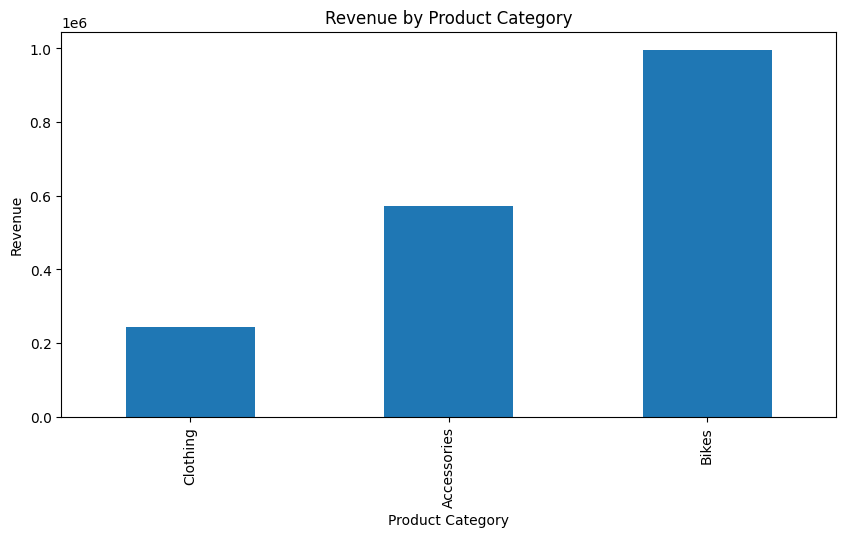

In [24]:
sales_data.groupby('Product Category')['Revenue'].sum().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.show()

### Patterns in revenue by product category and sub category

Next, we examined the potential patterns in revenue by product categories and subcategories was conducted. Through the analysis of summary statistics, it was determined that Tires and Tubes had the highest count of products sold, while the highest average revenue per product was generated by the Mountain Bike category at $1,891.

In [25]:
sales_data.groupby('Sub Category')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
Sub Category,,,,,,,,
Bike Racks,12.0,1629.833333,1531.662367,136.0,504.25,1191.0,2213.25,4923.0
Bike Stands,14.0,1031.142857,497.719392,375.0,611.00,947.5,1410.00,1778.0
Bottles and Cages,241.0,132.269710,93.470928,5.0,60.00,119.0,182.00,462.0
Caps,113.0,174.176991,90.229591,10.0,92.00,187.0,249.00,344.0
Cleaners,88.0,142.568182,86.421820,9.0,65.00,142.5,217.00,323.0
Fenders,64.0,416.109375,239.783574,25.0,213.00,429.5,593.25,951.0
Gloves,35.0,416.400000,305.975220,59.0,148.50,310.0,687.50,1008.0
Helmets,314.0,630.920382,385.101128,30.0,285.75,617.5,925.75,1500.0
Hydration Packs,25.0,1044.760000,416.965954,91.0,748.00,1020.0,1344.00,1842.0


The average revenue by subcategory revealed that the bike category had the highest average revenue. However, it was also noted that the bike category had the highest average cost compared to the other categories.

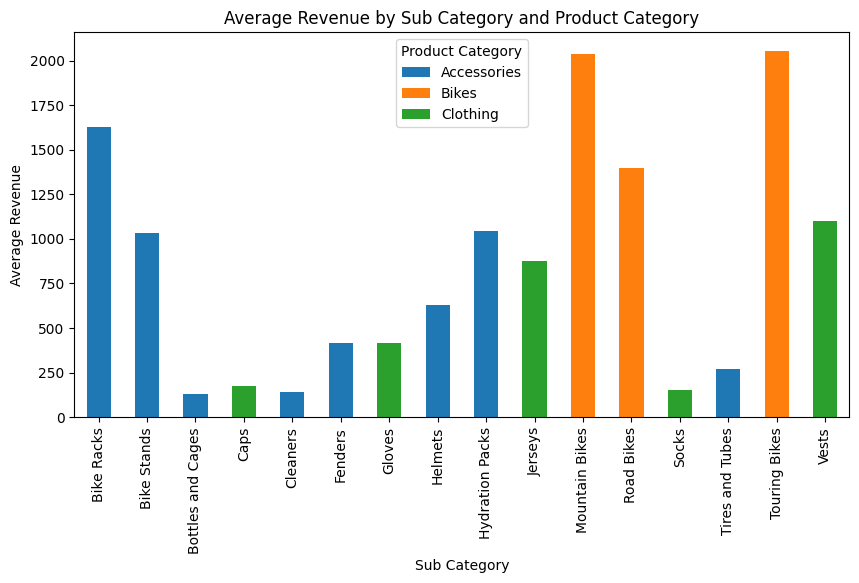

In [26]:
sales_data.groupby(['Sub Category', 'Product Category'])['Revenue'].mean().unstack().plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Average Revenue by Sub Category and Product Category')
plt.xlabel('Sub Category')
plt.ylabel('Average Revenue')
plt.show()

C:\Users\annco\AppData\Local\Temp\ipykernel_17748\2111250516.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_data.groupby('Sub Category')['Revenue', 'Cost'].mean().plot(kind='bar', figsize=(10, 5))


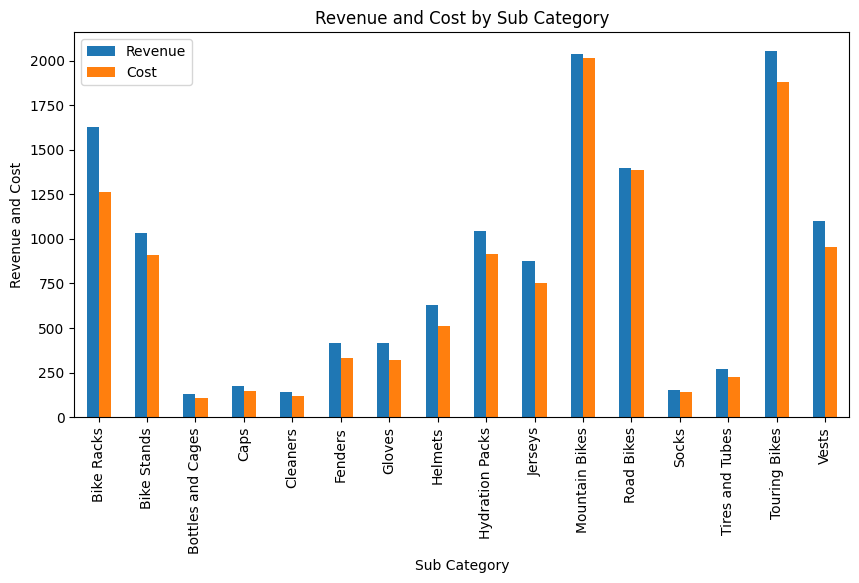

In [27]:
sales_data.groupby('Sub Category')['Revenue', 'Cost'].mean().plot(kind='bar', figsize=(10, 5))
plt.title('Revenue and Cost by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Revenue and Cost')
plt.show()

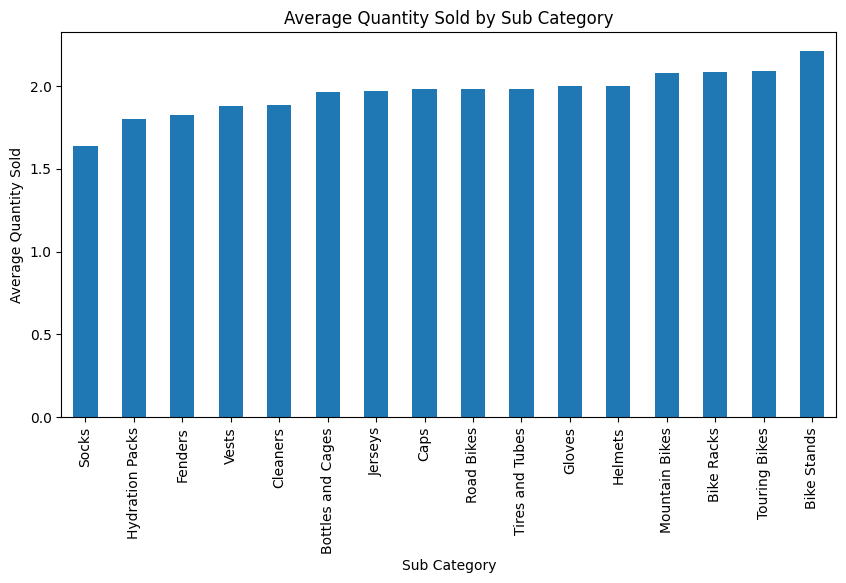

In [28]:
sales_data.groupby('Sub Category')['Quantity'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Quantity Sold by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Average Quantity Sold')
plt.show()

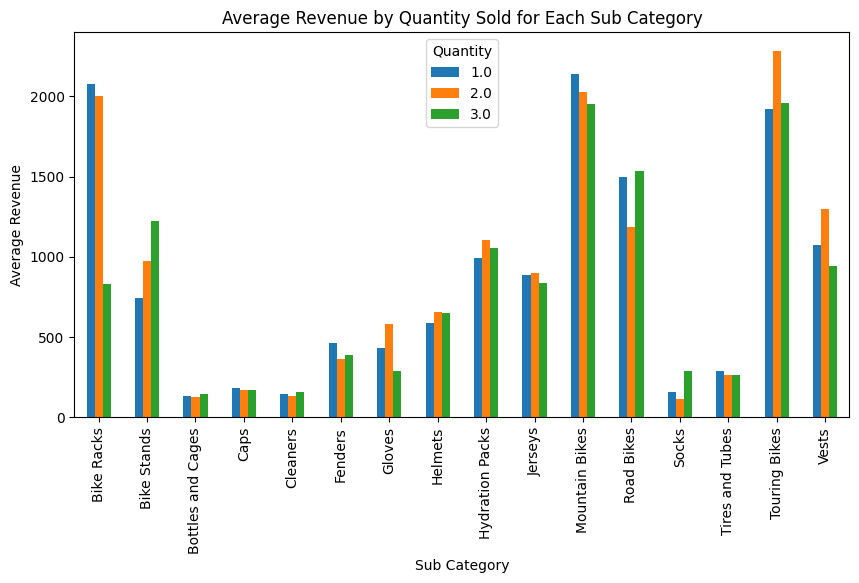

In [29]:
sales_data.groupby(['Sub Category', 'Quantity'])['Revenue'].mean().unstack().plot(kind='bar', figsize=(10, 5))
plt.title('Average Revenue by Quantity Sold for Each Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Average Revenue')
plt.show()


In [30]:
sales_data['Profit Margin'] = (sales_data['Revenue'] - sales_data['Cost']) / sales_data['Revenue']

A new column named "Profit Margin" was created by subtracting the cost from revenue. The resulting data was then visualized through the creation of plots for each subcategory. The analysis revealed that all three bike subcategories had the lowest profit margins. On the other hand, accessories such as bike racks, fenders, and gloves had profit margins ranging between 15-20%.

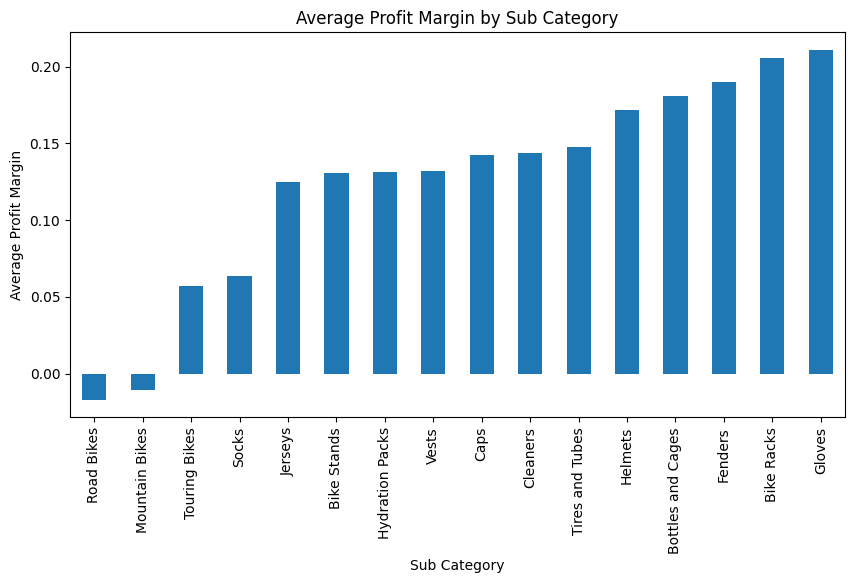

In [31]:
sales_data.groupby('Sub Category')['Profit Margin'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Profit Margin by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Average Profit Margin')
plt.show()

### Patterns in revenue by geographic location

We then investigated whether countries had an effect on revenue. With approximately $10.3 million in sales, the United States accounts for 52% of the market.

In [32]:
sales_data['Country'].value_counts(normalize=True)

United States     0.601787
France            0.167055
United Kingdom    0.133644
Germany           0.097514
Name: Country, dtype: float64

In [33]:
sales_data.pivot_table(index='Country', values='Revenue', aggfunc='sum')

,Revenue
Country,
France,391566.0
Germany,245817.0
United Kingdom,298926.0
United States,875078.0


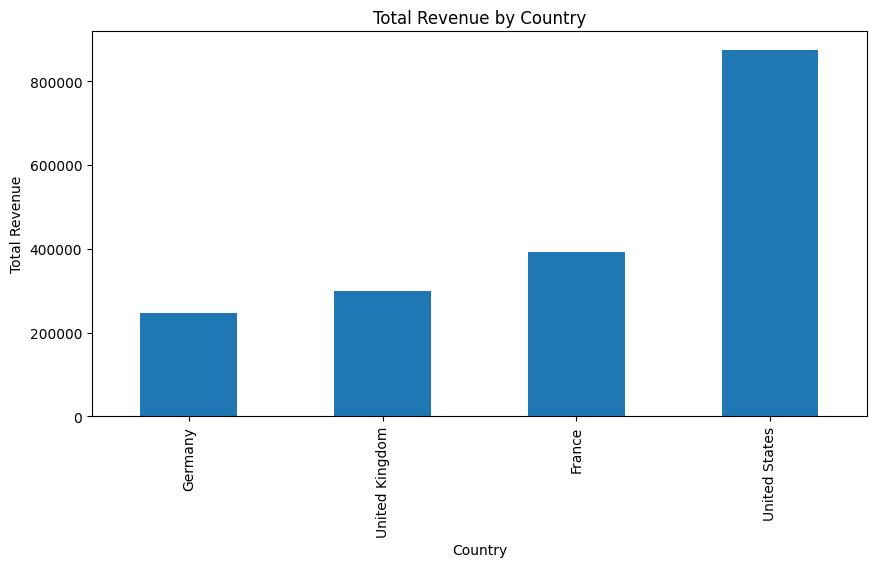

In [34]:
sales_data.groupby('Country')['Revenue'].sum().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Total Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.show()

However, costs were much higher in other markets, such as Germany and the United Kingdom.

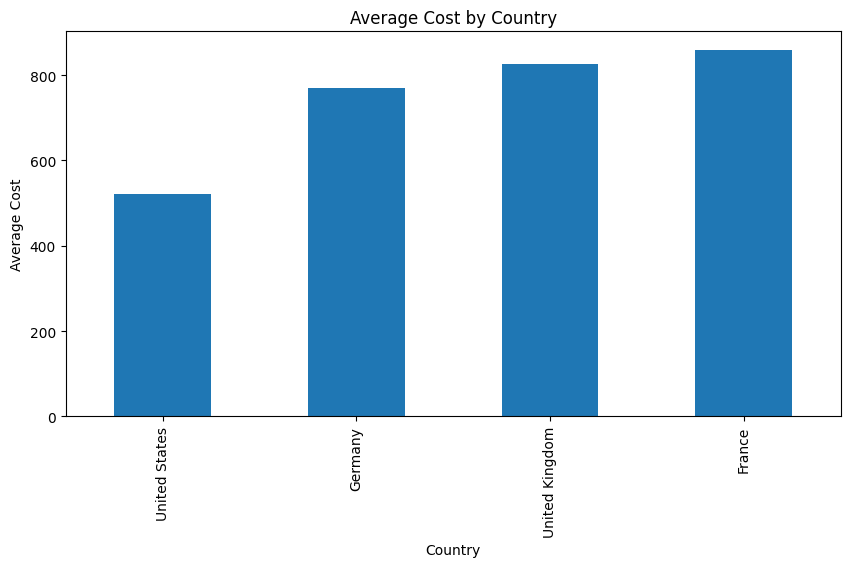

In [35]:
sales_data.groupby('Country')['Cost'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Cost by Country')
plt.xlabel('Country')
plt.ylabel('Average Cost')
plt.show()

Despite lower revenue and higher costs, Germany had the highest profit margin of any market. This suggests that the United States' pricing strategy is not being optimized to its full potential.

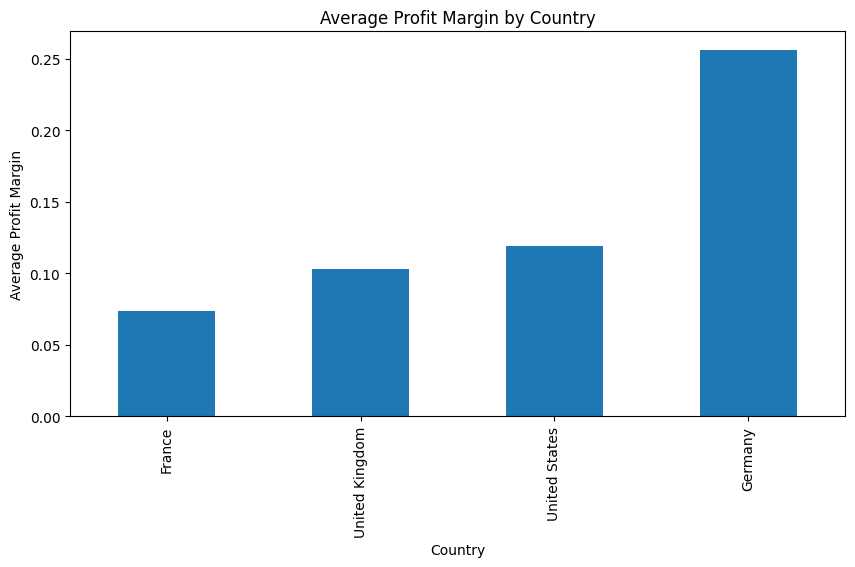

In [36]:
sales_data.groupby('Country')['Profit Margin'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Profit Margin by Country')
plt.xlabel('Country')
plt.ylabel('Average Profit Margin')
plt.show()

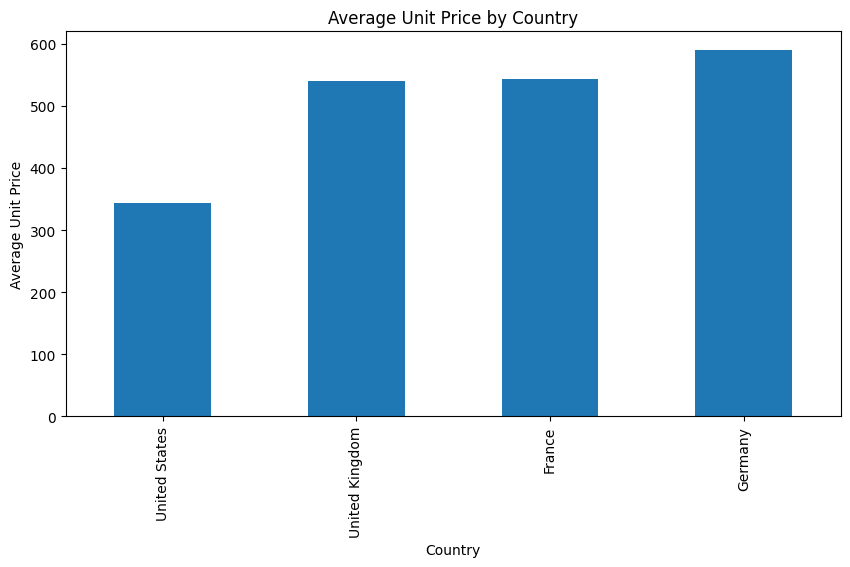

In [37]:
sales_data.groupby('Country')['Unit Price'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Unit Price by Country')
plt.xlabel('Country')
plt.ylabel('Average Unit Price')
plt.show()

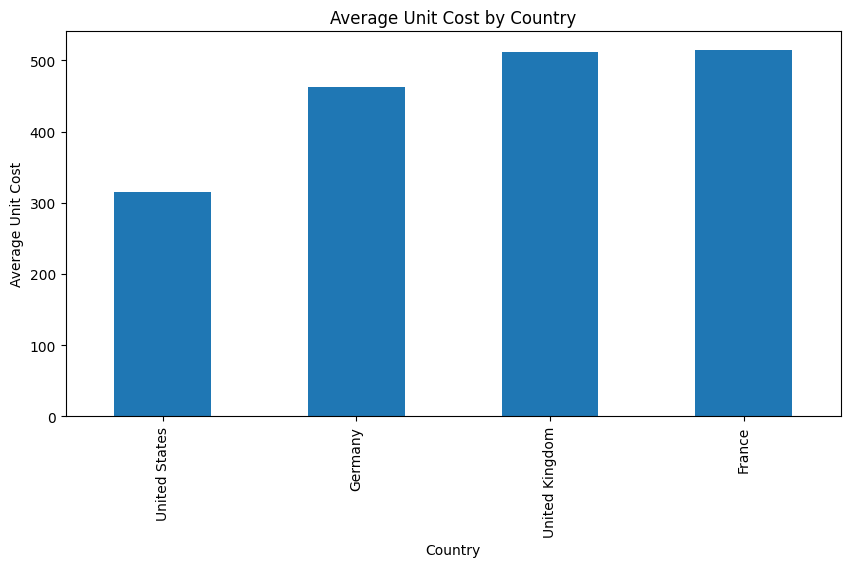

In [38]:
sales_data.groupby('Country')['Unit Cost'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Unit Cost by Country')
plt.xlabel('Country')
plt.ylabel('Average Unit Cost')
plt.show()

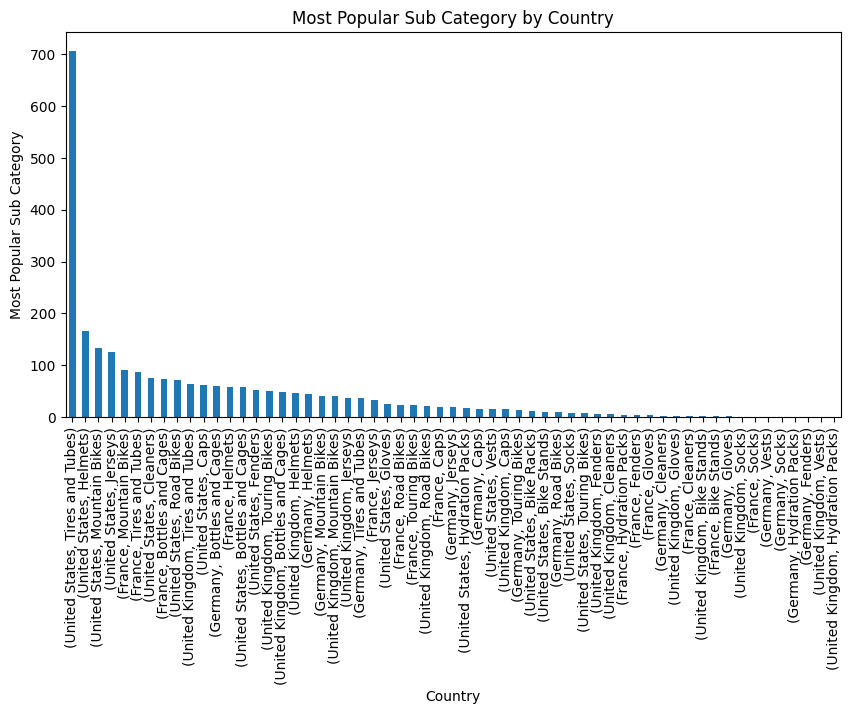

In [40]:
sales_data.groupby('Country')['Sub Category'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Most Popular Sub Category by Country')
plt.xlabel('Country')
plt.ylabel('Most Popular Sub Category')
plt.show()

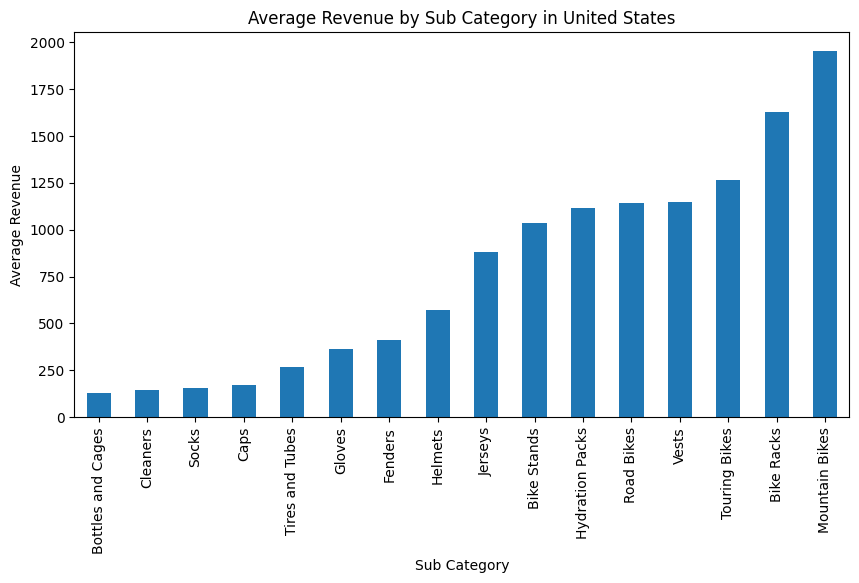

In [40]:
sales_data[sales_data['Country'] == 'United States'].groupby('Sub Category')['Revenue'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Revenue by Sub Category in United States')
plt.xlabel('Sub Category')
plt.ylabel('Average Revenue')
plt.show()

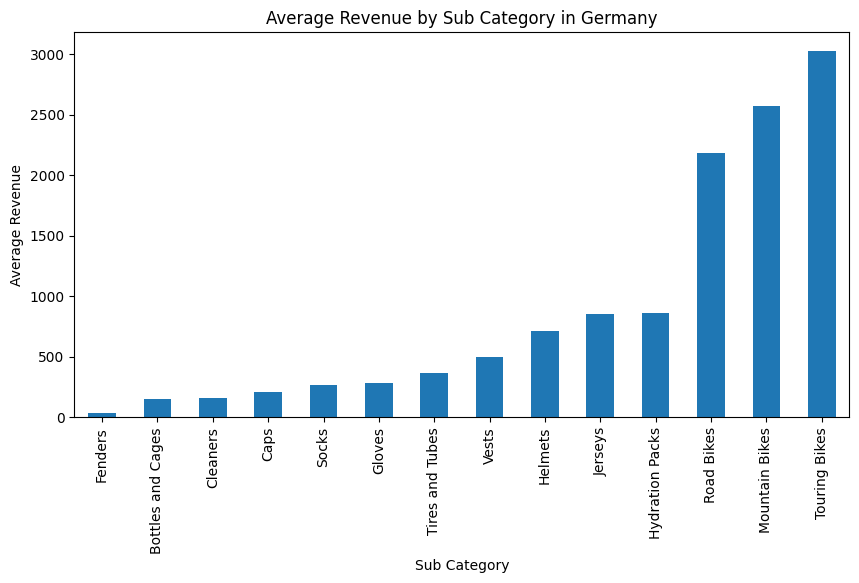

In [41]:
sales_data[sales_data['Country'] == 'Germany'].groupby('Sub Category')['Revenue'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Revenue by Sub Category in Germany')
plt.xlabel('Sub Category')
plt.ylabel('Average Revenue')
plt.show()

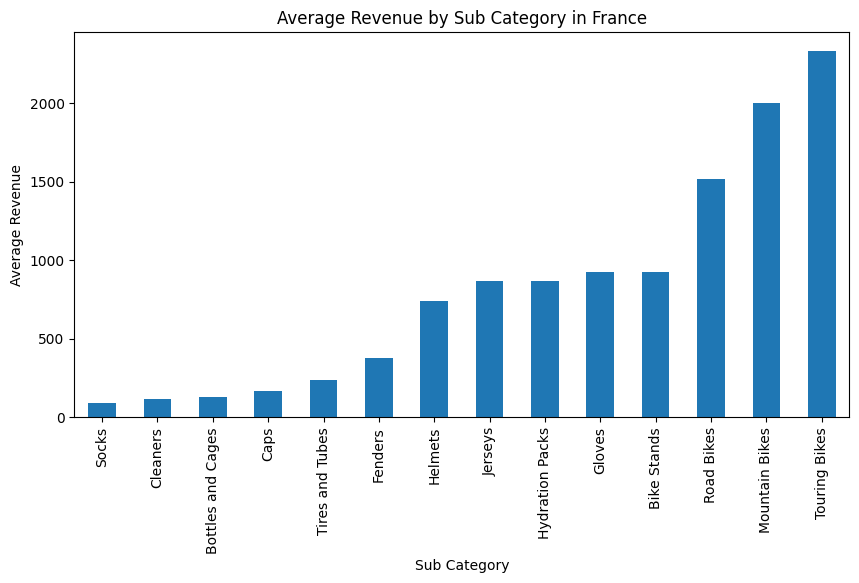

In [42]:
sales_data[sales_data['Country'] == 'France'].groupby('Sub Category')['Revenue'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Revenue by Sub Category in France')
plt.xlabel('Sub Category')
plt.ylabel('Average Revenue')
plt.show()

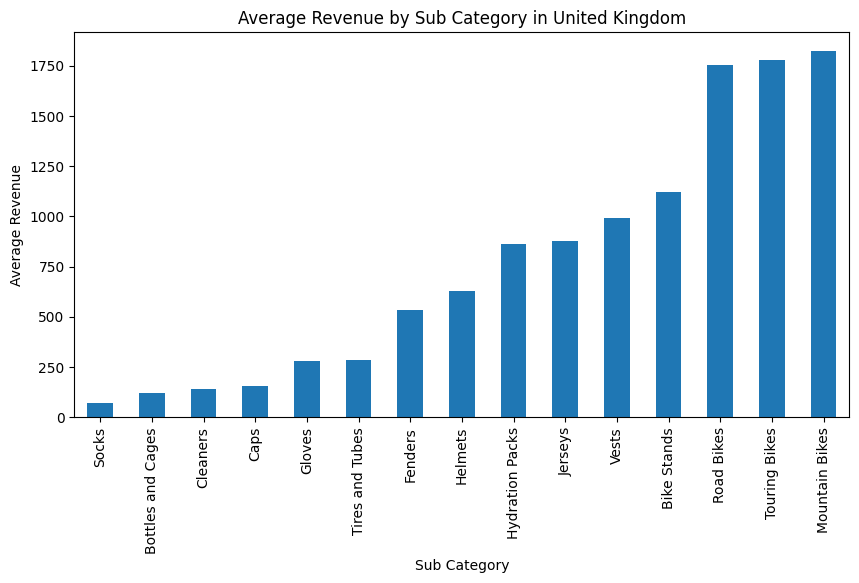

In [43]:
sales_data[sales_data['Country'] == 'United Kingdom'].groupby('Sub Category')['Revenue'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Revenue by Sub Category in United Kingdom')
plt.xlabel('Sub Category')
plt.ylabel('Average Revenue')
plt.show()

Bike stands, one of the most popular items for the store, is not sold at all in Germany. Neither are bike racks.

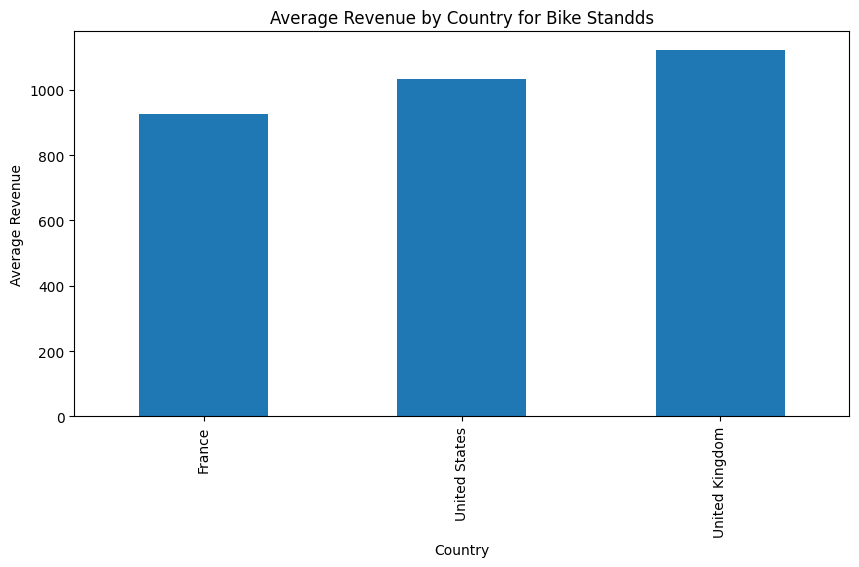

In [44]:
sales_data[sales_data['Sub Category'] == 'Bike Stands'].groupby('Country')['Revenue'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Revenue by Country for Bike Standds')
plt.xlabel('Country')
plt.ylabel('Average Revenue')
plt.show()

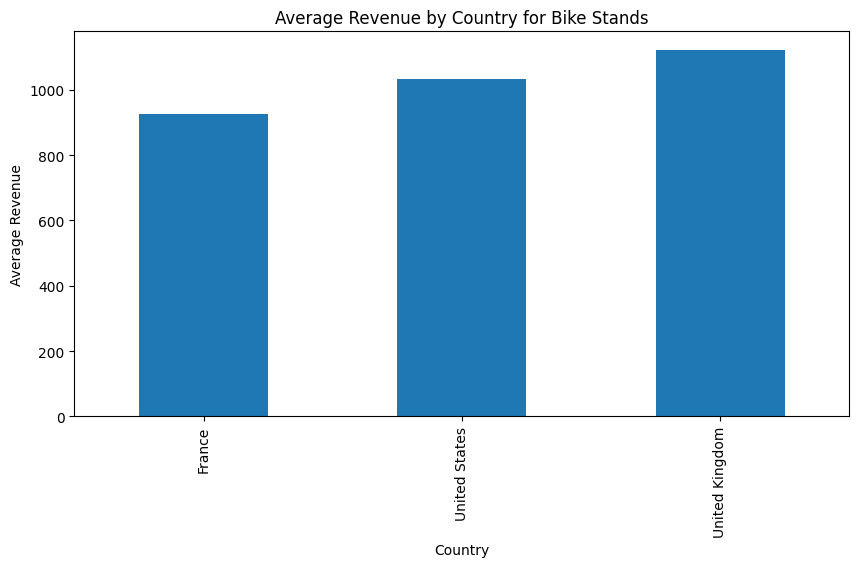

In [45]:
sales_data[sales_data['Sub Category'] == 'Bike Stands'].groupby('Country')['Revenue'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Revenue by Country for Bike Stands')
plt.xlabel('Country')
plt.ylabel('Average Revenue')
plt.show()

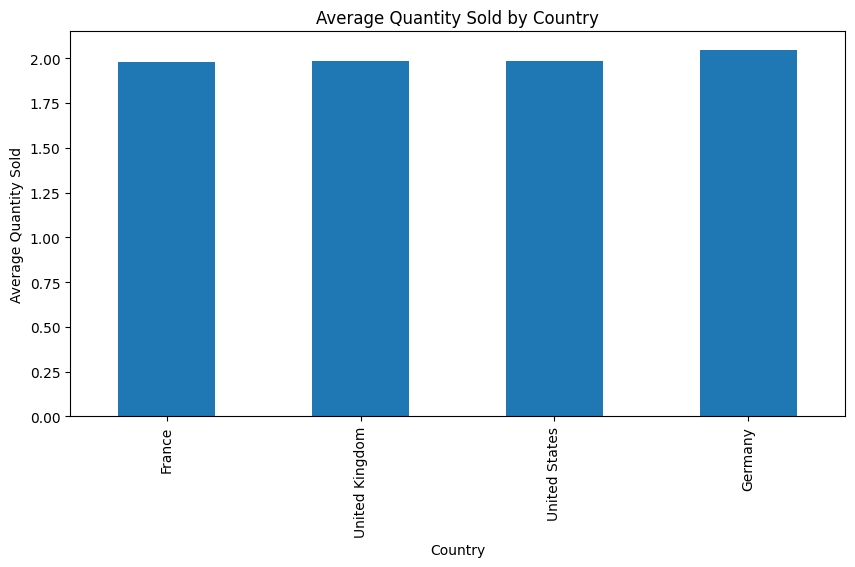

In [46]:
sales_data.groupby('Country')['Quantity'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Quantity Sold by Country')
plt.xlabel('Country')
plt.ylabel('Average Quantity Sold')
plt.show()

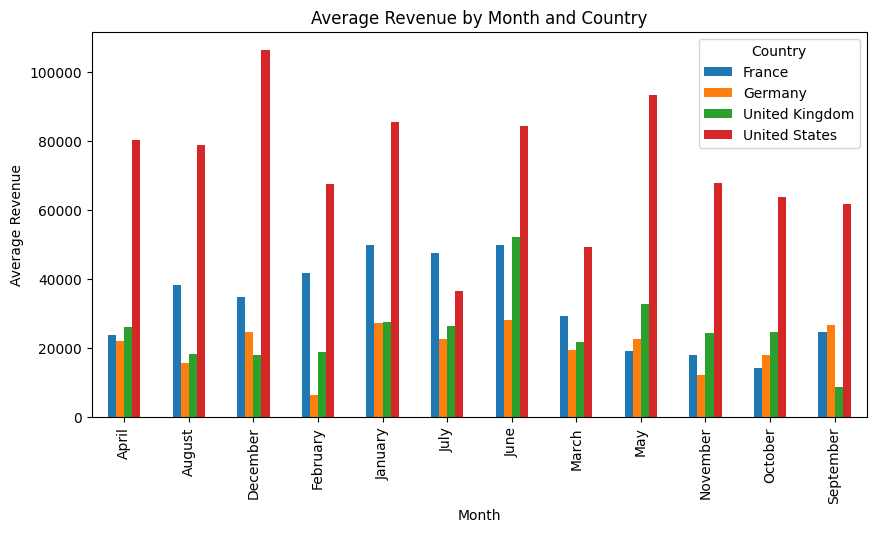

In [50]:
sales_data.groupby(['Month', 'Country'])['Revenue'].sum().unstack().plot(kind='bar', figsize=(10, 5))
plt.title('Average Revenue by Month and Country')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.show()

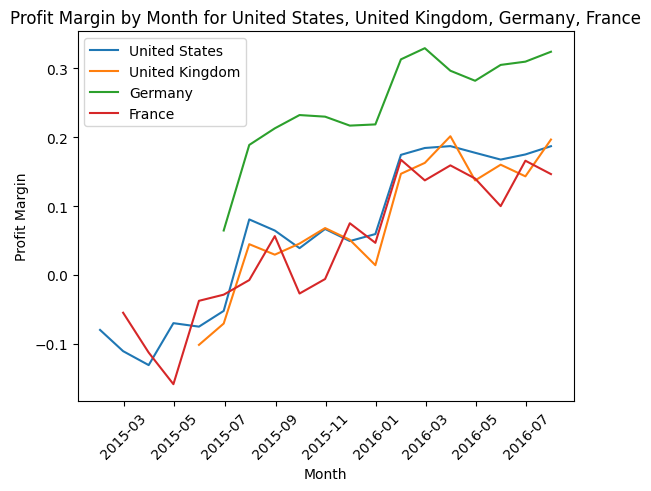

In [48]:
us_profit_margin_by_month = us_data.resample('M')['Profit Margin'].mean()
de_profit_margin_by_month = de_data.resample('M')['Profit Margin'].mean()
fr_profit_margin_by_month = fr_data.resample('M')['Profit Margin'].mean()
uk_profit_margin_by_month = uk_data.resample('M')['Profit Margin'].mean()

plt.plot(us_profit_margin_by_month.index, us_profit_margin_by_month, label='United States')
plt.plot(uk_profit_margin_by_month.index, uk_profit_margin_by_month, label='United Kingdom')
plt.plot(de_profit_margin_by_month.index, de_profit_margin_by_month, label='Germany')
plt.plot(fr_profit_margin_by_month.index, fr_profit_margin_by_month, label='France')
plt.title('Profit Margin by Month for United States, United Kingdom, Germany, France')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Profit Margin')
plt.legend()
plt.show()

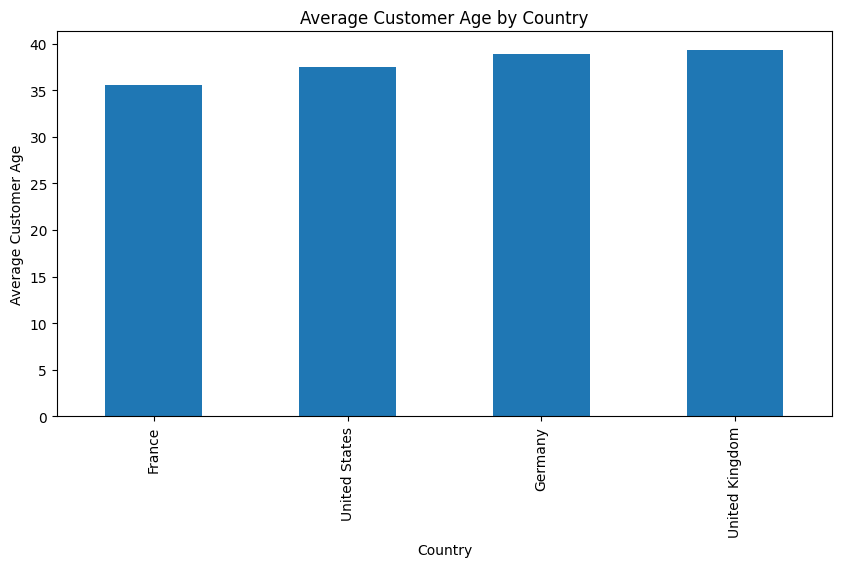

In [51]:
sales_data.groupby('Country')['Customer Age'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Customer Age by Country')
plt.xlabel('Country')
plt.ylabel('Average Customer Age')
plt.show()

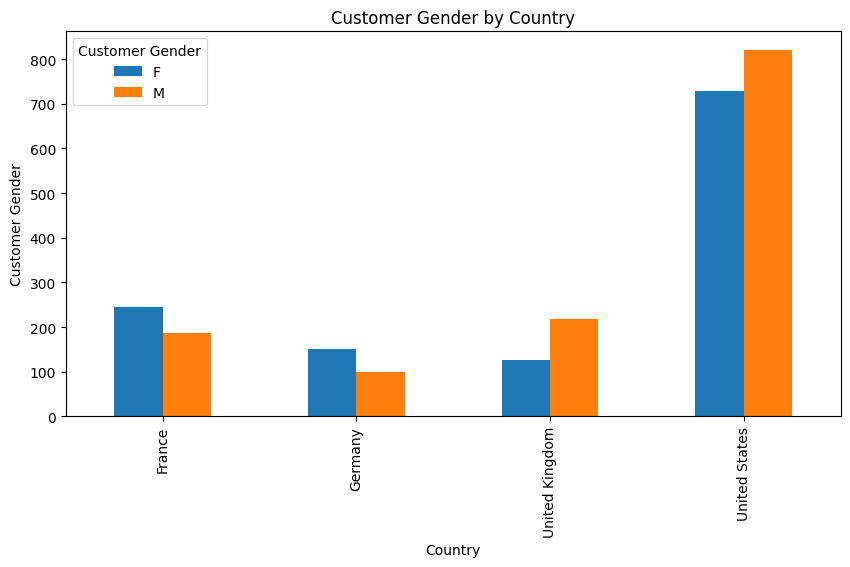

In [52]:
sales_data.groupby('Country')['Customer Gender'].value_counts().unstack().plot(kind='bar', figsize=(10, 5))
plt.title('Customer Gender by Country')
plt.xlabel('Country')
plt.ylabel('Customer Gender')
plt.show()


California, England (UK), Washington, and Oregon were the states with the most revenue.

In [ ]:
sales_data.groupby('State')['Revenue'].sum().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Total Revenue by State')
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.show()

Massachusetts and Arizona both had the highest costs of any state desipte have very low revenue. They also had the smallest profit margin out of any state either.

In [ ]:
sales_data.groupby('State')['Cost'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Cost by State')
plt.xlabel('State')
plt.ylabel('Average Cost')
plt.show()

In [ ]:
sales_data.groupby('State')['Profit Margin'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Profit Margin by State')
plt.xlabel('State')
plt.ylabel('Average Profit Margin')
plt.show()

### Patterns in revenue by customer demographic

With regards to customer demographic, an analysis was conducted to determine the potential impact of age and gender on revenue. Based on the data of 34,866 customers, the average age was 36 and the most populous age group was between 28-37 years old. This demographic could potentially be identified as the target group for promotional campaigns, as they were found to generate the most revenue.

In [ ]:
print(sales_data['Customer Age'].describe())

In [ ]:
sales_data['Customer Age Group'] = pd.cut(sales_data['Customer Age'], bins=[17, 27, 37, 47, 57, 67, 77, 87], labels=['17-27', '28-37', '38-47', '48-57', '58-67', '68-77', '78-87'])
sales_data['Customer Age Group'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Customers per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()

Further analysis revealed that the demographic of 28-37 years old provided the highest revenue for the company, followed by the demographic of 38-47 years old.

In [ ]:
sales_data.groupby('Customer Age Group')['Revenue'].sum().plot(kind='bar', figsize=(10, 5))
plt.title('Total Revenue by Customer Age Group')
plt.xlabel('Customer Age Group')
plt.ylabel('Total Revenue')
plt.show()

Additionally, the potential impact of gender on revenue generation was conducted by reviewing the Customer Gender column of the dataset. The analysis revealed that while there was a relatively balanced ratio of male and female customers, male customers were observed to generate slightly higher revenue than female customers.

In [ ]:
print(sales_data['Customer Gender'].value_counts())

In [ ]:
# Total revenue by each 'Customer Gender'
sales_data.groupby('Customer Gender')['Revenue'].sum().plot(kind='bar', figsize=(10, 5))
plt.title('Total Revenue by Customer Gender')
plt.xlabel('Customer Gender')
plt.ylabel('Total Revenue')
plt.show()

However, a more detailed analysis of key demographic, ages between 28-37, revealed that female customers generated more revenue than male customers.

In [ ]:
sales_data.groupby(['Customer Age Group', 'Customer Gender'])['Revenue', 'Cost'].mean().unstack().plot(kind='bar', figsize=(10, 5))
plt.title('Average Revenue and Cost by Customer Age Group and Gender')
plt.xlabel('Customer Age Group and Gender')
plt.ylabel('Average Revenue and Cost')
plt.show()

In [ ]:
sales_data.groupby(['Customer Age Group', 'Customer Gender'])['Profit Margin'].mean().unstack().plot(kind='bar', figsize=(10, 5))
plt.title('Average Profit Margin by Customer Age Group and Gender')
plt.xlabel('Customer Age Group and Gender')
plt.ylabel('Average Profit Margin')
plt.show()

In [ ]:
sales_data.groupby(['Customer Age Group', 'Customer Gender'])['Revenue', 'Unit Price'].mean().unstack().plot(kind='bar', figsize=(10, 5))
plt.title('Average Revenue and Unit Price by Customer Age and Gender')
plt.xlabel('Customer Age and Gender')
plt.ylabel('Average Revenue and Unit Price')
plt.show()

In [ ]:
sales_data.groupby(['Customer Age Group', 'Customer Gender'])['Revenue', 'Quantity'].mean().unstack().plot(kind='bar', figsize=(10, 5))
plt.title('Average Revenue and Unit Price by Customer Age and Gender')
plt.xlabel('Customer Age and Gender')
plt.ylabel('Average Revenue and Quantity')
plt.show()

### Patterns in revenue by unit price

Unit price is a crucial element in pricing optimization as it directly impacts the revenue generated by the company. The analysis began by examining the unit price for each subcategory. The results revealed that the majority of products sold were priced under $300. To further validate this observation, a histogram was created to illustrate the distribution of unit prices.

In [ ]:
# unit price for each sub category using a pivot table
sales_data.pivot_table(index='Sub Category', values='Unit Price', aggfunc='mean')

In [ ]:
sales_data['Unit Price'].plot(kind='hist', bins=20, figsize=(10, 5))
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

To gain a deeper understanding of the pricing strategy for each category, a bar graph was created to illustrate the average unit price for each category. The visualization indicates that on average, bikes were the most expensive category, which may explain the high revenue generated from this category. In contrast, the average unit price for accessories was more varied, indicating that pricing for this category may be less consistent.

In [ ]:
sales_data.groupby(['Sub Category', 'Product Category'])['Unit Price'].mean().unstack().plot(kind='bar', figsize=(10, 5))
plt.title('Average Unit Price by Sub Category and Product Category')
plt.xlabel('Sub Category and Product Category')
plt.ylabel('Average Unit Price')
plt.show()

The scatterplot below illustrates the relationship between unit price and revenue for each product. The visualization reveals a strong correlation between the two variables. However, at this point, further analysis would be necessary to determine if increasing prices would result in higher revenue.

In [ ]:
sales_data.groupby('Sub Category')['Unit Price', 'Revenue'].mean().plot(kind='scatter', x='Unit Price', y='Revenue', figsize=(10, 5))
plt.title('Average Unit Price and Revenue by Sub Category')
plt.xlabel('Average Unit Price')
plt.ylabel('Average Revenue')
plt.show()

However, it appears that there is no correlation between unit price and quantity sold for each product, as shown in the scatterplot . This suggests that increasing or decreasing the unit price may not affect the quantity of products sold, hence it's not a determinant factor on the quantity sold.

In [ ]:
sales_data.groupby('Sub Category')['Unit Price', 'Quantity'].mean().plot(kind='scatter', x='Unit Price', y='Quantity', figsize=(10, 5))
plt.title('Average Unit Price and Quantity by Sub Category')
plt.xlabel('Average Unit Price')
plt.ylabel('Average Quantity')
plt.show()

### Patterns in revenue by unit cost

Next, the analysis focused on identifying patterns in revenue by unit cost. The objective was to determine the extent to which unit cost influenced unit price and the impact it had on revenue for each product. To accomplish this, I first created a histogram to visualize the distribution of unit costs. 

At first look, the distribution of unit cost is right-skewed. While the majority of the data points have a lower unit cost values, there are a few outliers with much higher unit cost values, such as the Mountain and Touring bikes.

In [ ]:
sales_data['Unit Cost'].plot(kind='hist', bins=20, figsize=(10, 5))
plt.title('Distribution of Unit Cost')
plt.xlabel('Unit Cost')
plt.ylabel('Frequency')
plt.show()

In [ ]:
sales_data.groupby(['Sub Category', 'Product Category'])['Unit Cost'].mean().unstack().plot(kind='bar', figsize=(10, 5))
plt.title('Average Unit Cost by Sub Category and Product Category')
plt.xlabel('Sub Category and Product Category')
plt.ylabel('Average Unit Cost')
plt.show()

An analysis of the data revealed a positive correlation between unit cost and revenue. This suggests that as the unit cost increases, revenue also increases for that subcategory. This correlation may indicate that products within this subcategory which have higher production costs also generate higher revenues. It is possible that this correlation is due to a variety of reasons such as high demand for the products in this subcategory, a higher perceived value or unique specialized features that justify the higher price point.

In [ ]:
sales_data.groupby('Sub Category')['Unit Cost', 'Revenue'].mean().plot(kind='scatter', x='Unit Cost', y='Revenue', figsize=(10, 5))
plt.title('Average Unit Cost and Revenue by Sub Category')
plt.xlabel('Average Unit Cost')
plt.ylabel('Average Revenue')
plt.show()